J053 Sharayu Puranik 

In [77]:
import pandas as pd
data_file = 'spam.csv'
try:
    df = pd.read_csv(data_file, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(data_file, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(data_file, encoding='ISO-8859-1')


In [78]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [81]:
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import string  
import re


In [82]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the preprocessing
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Separate the spam and ham messages
spam_messages = df[df['label'] == 'spam']['cleaned_message']
ham_messages = df[df['label'] == 'ham']['cleaned_message']

# Function to get n-grams
def get_ngrams(messages, n=1):
    ngrams_list = []
    for message in messages:
        tokens = message.split()
        ngrams_list.extend(ngrams(tokens, n))
    return ngrams_list

# Function to get the most common n-grams
def most_common_ngrams(messages, n=1, num=10):
    ngrams_list = get_ngrams(messages, n)
    ngrams_counts = Counter(ngrams_list)
    return ngrams_counts.most_common(num)

# Function to create a word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [83]:
# 1. Most frequent words (unigrams)
print("Most common words in spam messages:")
print(most_common_ngrams(spam_messages, n=1))

Most common words in spam messages:
[(('å',), 299), (('free',), 224), (('2',), 206), (('u',), 174), (('txt',), 163), (('ur',), 144), (('4',), 137), (('mobile',), 127), (('text',), 125), (('stop',), 121)]


In [84]:
print("Most common words in ham messages:")
print(most_common_ngrams(ham_messages, n=1))

Most common words in ham messages:
[(('u',), 1018), (('s',), 478), (('m',), 405), (('t',), 375), (('2',), 322), (('gt',), 318), (('lt',), 316), (('just',), 293), (('ok',), 287), (('ll',), 265)]


In [85]:
# 2. Most frequent bi-grams
print("Most common bi-grams in spam messages:")
print(most_common_ngrams(spam_messages, n=2))

print("Most common bi-grams in ham messages:")
print(most_common_ngrams(ham_messages, n=2))

Most common bi-grams in spam messages:
[(('å', '1'), 39), (('1', '50'), 37), (('å', '1000'), 35), (('contact', 'u'), 35), (('won', 'å'), 33), (('t', 'cs'), 33), (('t', 'c'), 27), (('å', '100'), 24), (('win', 'å'), 24), (('po', 'box'), 24)]
Most common bi-grams in ham messages:
[(('lt', 'gt'), 276), (('don', 't'), 130), (('didn', 't'), 44), (('ll', 'later'), 42), (('let', 'know'), 39), (('sorry', 'll'), 39), (('u', 'r'), 39), (('r', 'u'), 37), (('good', 'morning'), 32), (('wan', '2'), 31)]


In [86]:
# 3. Most frequent tri-grams
print("Most common tri-grams in spam messages:")
print(most_common_ngrams(spam_messages, n=3))

print("Most common tri-grams in ham messages:")
print(most_common_ngrams(ham_messages, n=3))

Most common tri-grams in spam messages:
[(('å', '1', '50'), 25), (('å', '1000', 'cash'), 23), (('1000', 'cash', 'å'), 15), (('suite342', '2lands', 'row'), 15), (('draw', 'shows', 'won'), 14), (('shows', 'won', 'å'), 14), (('land', 'line', 'claim'), 14), (('å', '2000', 'prize'), 13), (('private', '2003', 'account'), 13), (('2003', 'account', 'statement'), 13)]
Most common tri-grams in ham messages:
[(('sorry', 'll', 'later'), 38), (('lt', 'decimal', 'gt'), 23), (('u', 'wan', '2'), 21), (('happy', 'new', 'year'), 18), (('don', 't', 'know'), 16), (('like', 'lt', 'gt'), 14), (('pls', 'send', 'message'), 13), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'pls'), 12), (('right', 'pls', 'send'), 12)]


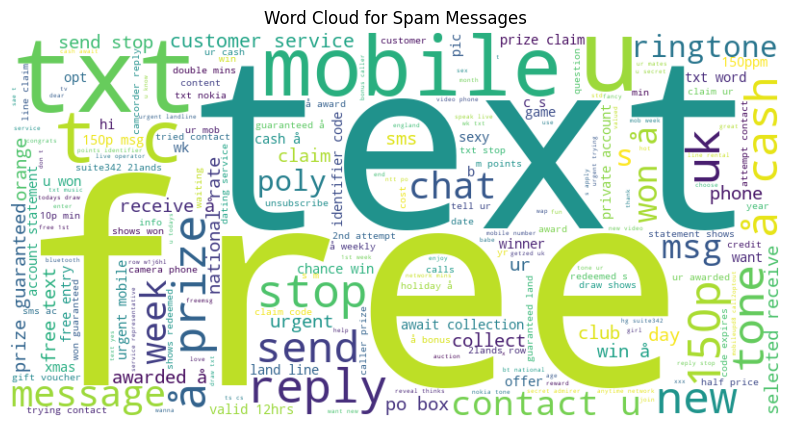

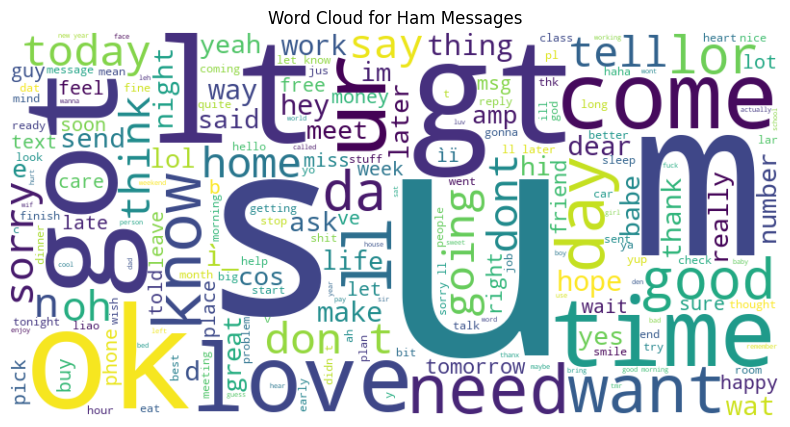

In [87]:
# 4. Create wordcloud for each class
create_wordcloud(spam_messages, "Word Cloud for Spam Messages")
create_wordcloud(ham_messages, "Word Cloud for Ham Messages")

BAG OF WORDS

In [88]:
# Convert text to BoW vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the BoW vectors into TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

print("Shape of training data:", X_train_tfidf.shape)
print("Shape of testing data:", X_test_tfidf.shape)

Shape of training data: (4457, 8404)
Shape of testing data: (1115, 8404)


In [89]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

# Compute the F1-score
f1 = f1_score(y_test, y_pred, pos_label='spam')
print(f"Logistic Regression F1-Score: {f1:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
class_report = classification_report(y_test, y_pred, labels=['spam', 'ham'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Logistic Regression F1-Score: 0.7459
Confusion Matrix:
[[ 91  59]
 [  3 962]]

Classification Report:
              precision    recall  f1-score   support

        spam       0.97      0.61      0.75       150
         ham       0.94      1.00      0.97       965

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



TF-IDF vectors

In [90]:
# Convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Compute the F1-score
f1 = f1_score(y_test, y_pred, pos_label='spam')
print(f"Logistic Regression F1-Score with TF-IDF: {f1:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
class_report = classification_report(y_test, y_pred, labels=['spam', 'ham'])

print("Confusion Matrix with TF-IDF:")
print(conf_matrix)
print("\nClassification Report with TF-IDF:")
print(class_report)



Logistic Regression F1-Score with TF-IDF: 0.7459
Confusion Matrix with TF-IDF:
[[ 91  59]
 [  3 962]]

Classification Report with TF-IDF:
              precision    recall  f1-score   support

        spam       0.97      0.61      0.75       150
         ham       0.94      1.00      0.97       965

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



Tf-IDF with text preprocessing:

In [91]:
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove email-ids, URLs, HTML tags
    text = re.sub(r'\S+@\S+', '', text)  # Remove email-ids
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print('F1-score:', f1)

F1-score: 0.7729083665338646


BoW: 0.7459

Tf-IDF: 0.7459

Tf-IDF with text preprocessing: 0.7729083665338646